# Demonstrate Nucleosome Clustering with the Sliding Nucleosome Model

Simulation of the sliding nucleosome model with the following parameters:

- Number of marks: 1
- Correlation in methylation pattern: FALSE
- Maximum number of binders per mark: 2

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [3]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([-9.5])

# Generate a methylation sequence
n_beads = 500
frac_methyl = 0.1
methyl_corr_length = 18.4
marks = nuc.gen_meth(n_beads, frac_methyl, methyl_corr_length)
marks = np.atleast_2d(marks).T

# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 45
linker_lengths = np.ones(marks.shape[0])
a = int(np.floor(15.1))
lam = -np.log(1 - 1 / linker_corr_length)

In [4]:
# Print the methylation pattern
print("Methylation Pattern (flattened, single mark):\n")
print(marks.flatten())

Methylation Pattern (flattened, single mark):

[1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 

#### Initialize the Nucleosome Array

In [5]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

#### Specify Simulation Parameters

In [6]:
out_dir = "output"
n_steps = 5000
n_save = 10

#### Run the Simulation

In [7]:
mc.mc_linkers(nuc_arr, n_save, n_steps, out_dir)

#### Inspect Configuration

In [8]:
# Extract the linker length distribution
linker_lengths = nuc_arr.linker_lengths

# Print the linker lengths
print("Linker Lengths:")
print(linker_lengths)

Linker Lengths:
[  3. 186.  59. 106. 141.  18.   8.  16. 105.  20. 170.  57.  11.  39.
  80.   4.  71.  26.   1.  24.   6.  18.  89.   3.  78.  45.  12.   3.
   8.  35.  41.   9.  70.  98.   1.  11.  97.  28.   5.  21.  43.  39.
  24.  42.   4.   7. 125.  35.  19.  45.   5.   6.   5.  14.  49.  40.
   4.  49.  25.  17.  71.  24.  63.  78.  27.  10.  41.   9.  18.   7.
  26.   9.  13.  18.  48.  88.  27. 168.  37.   2.  14.  69.  16.   8.
  63.  96.  13.  53.  46.  13.  53.  60.  59.  11.  81.  28.  55.   1.
  33.  62.  32.  22.  24.   6.  39.  67.  31.  47.  13.  32.   4.   1.
   3.  10.   5.  31.   3.  95. 104.  54.   8.  46. 154. 156.  37.  13.
   6.  10.   1.   6.   1.  53.  28. 134.  49.  46.  47.  49.  19.  23.
  75.  23.  11.  22.  45.  19. 119.  92.   7.  26.  10.  27.   4.  19.
  18.  57.   6.   2.  24.   9.  33. 125.  82.  19.   4.   7.  19. 101.
   8.  24.  33.  13. 124.  36. 122.  52. 111.   5.  95.  60.  37.  22.
   6.  16.  99.  42.   5.  18.  90.  54.  77.  49.   2.  75. 

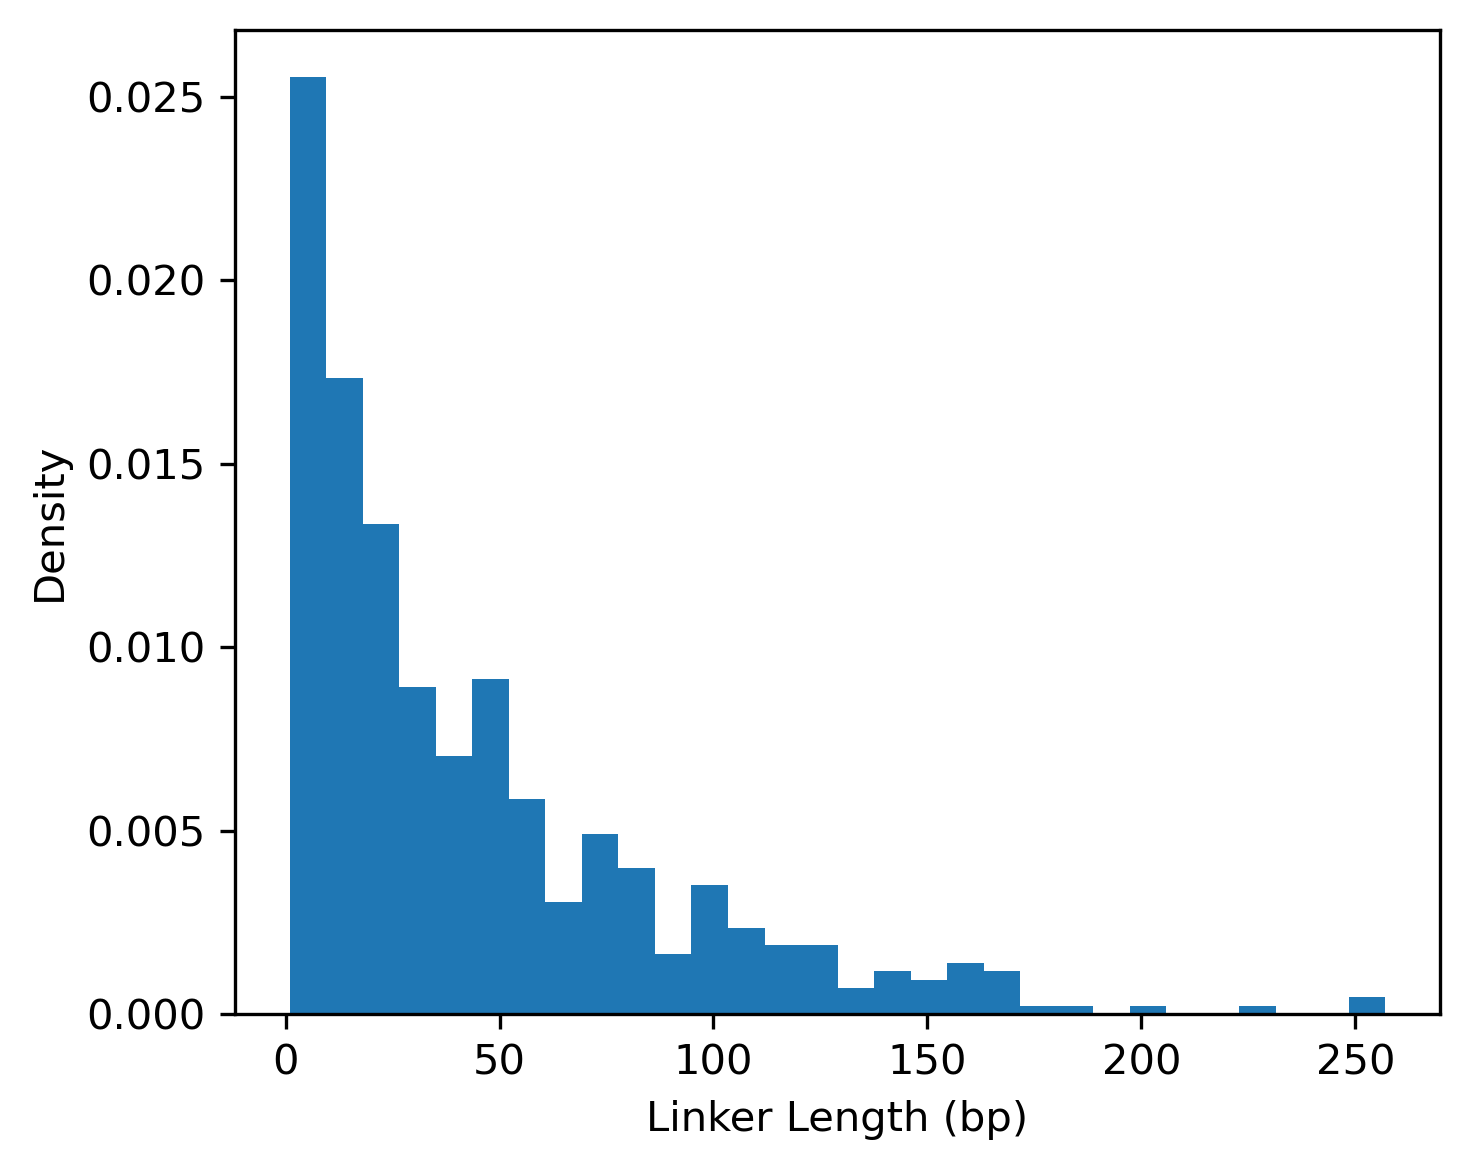

In [9]:
# Plot the linker length distribution
nbins = 30
plt.figure(figsize=(5,4), dpi=300)
plt.hist(linker_lengths, bins=nbins, density=True)
plt.xlabel("Linker Length (bp)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

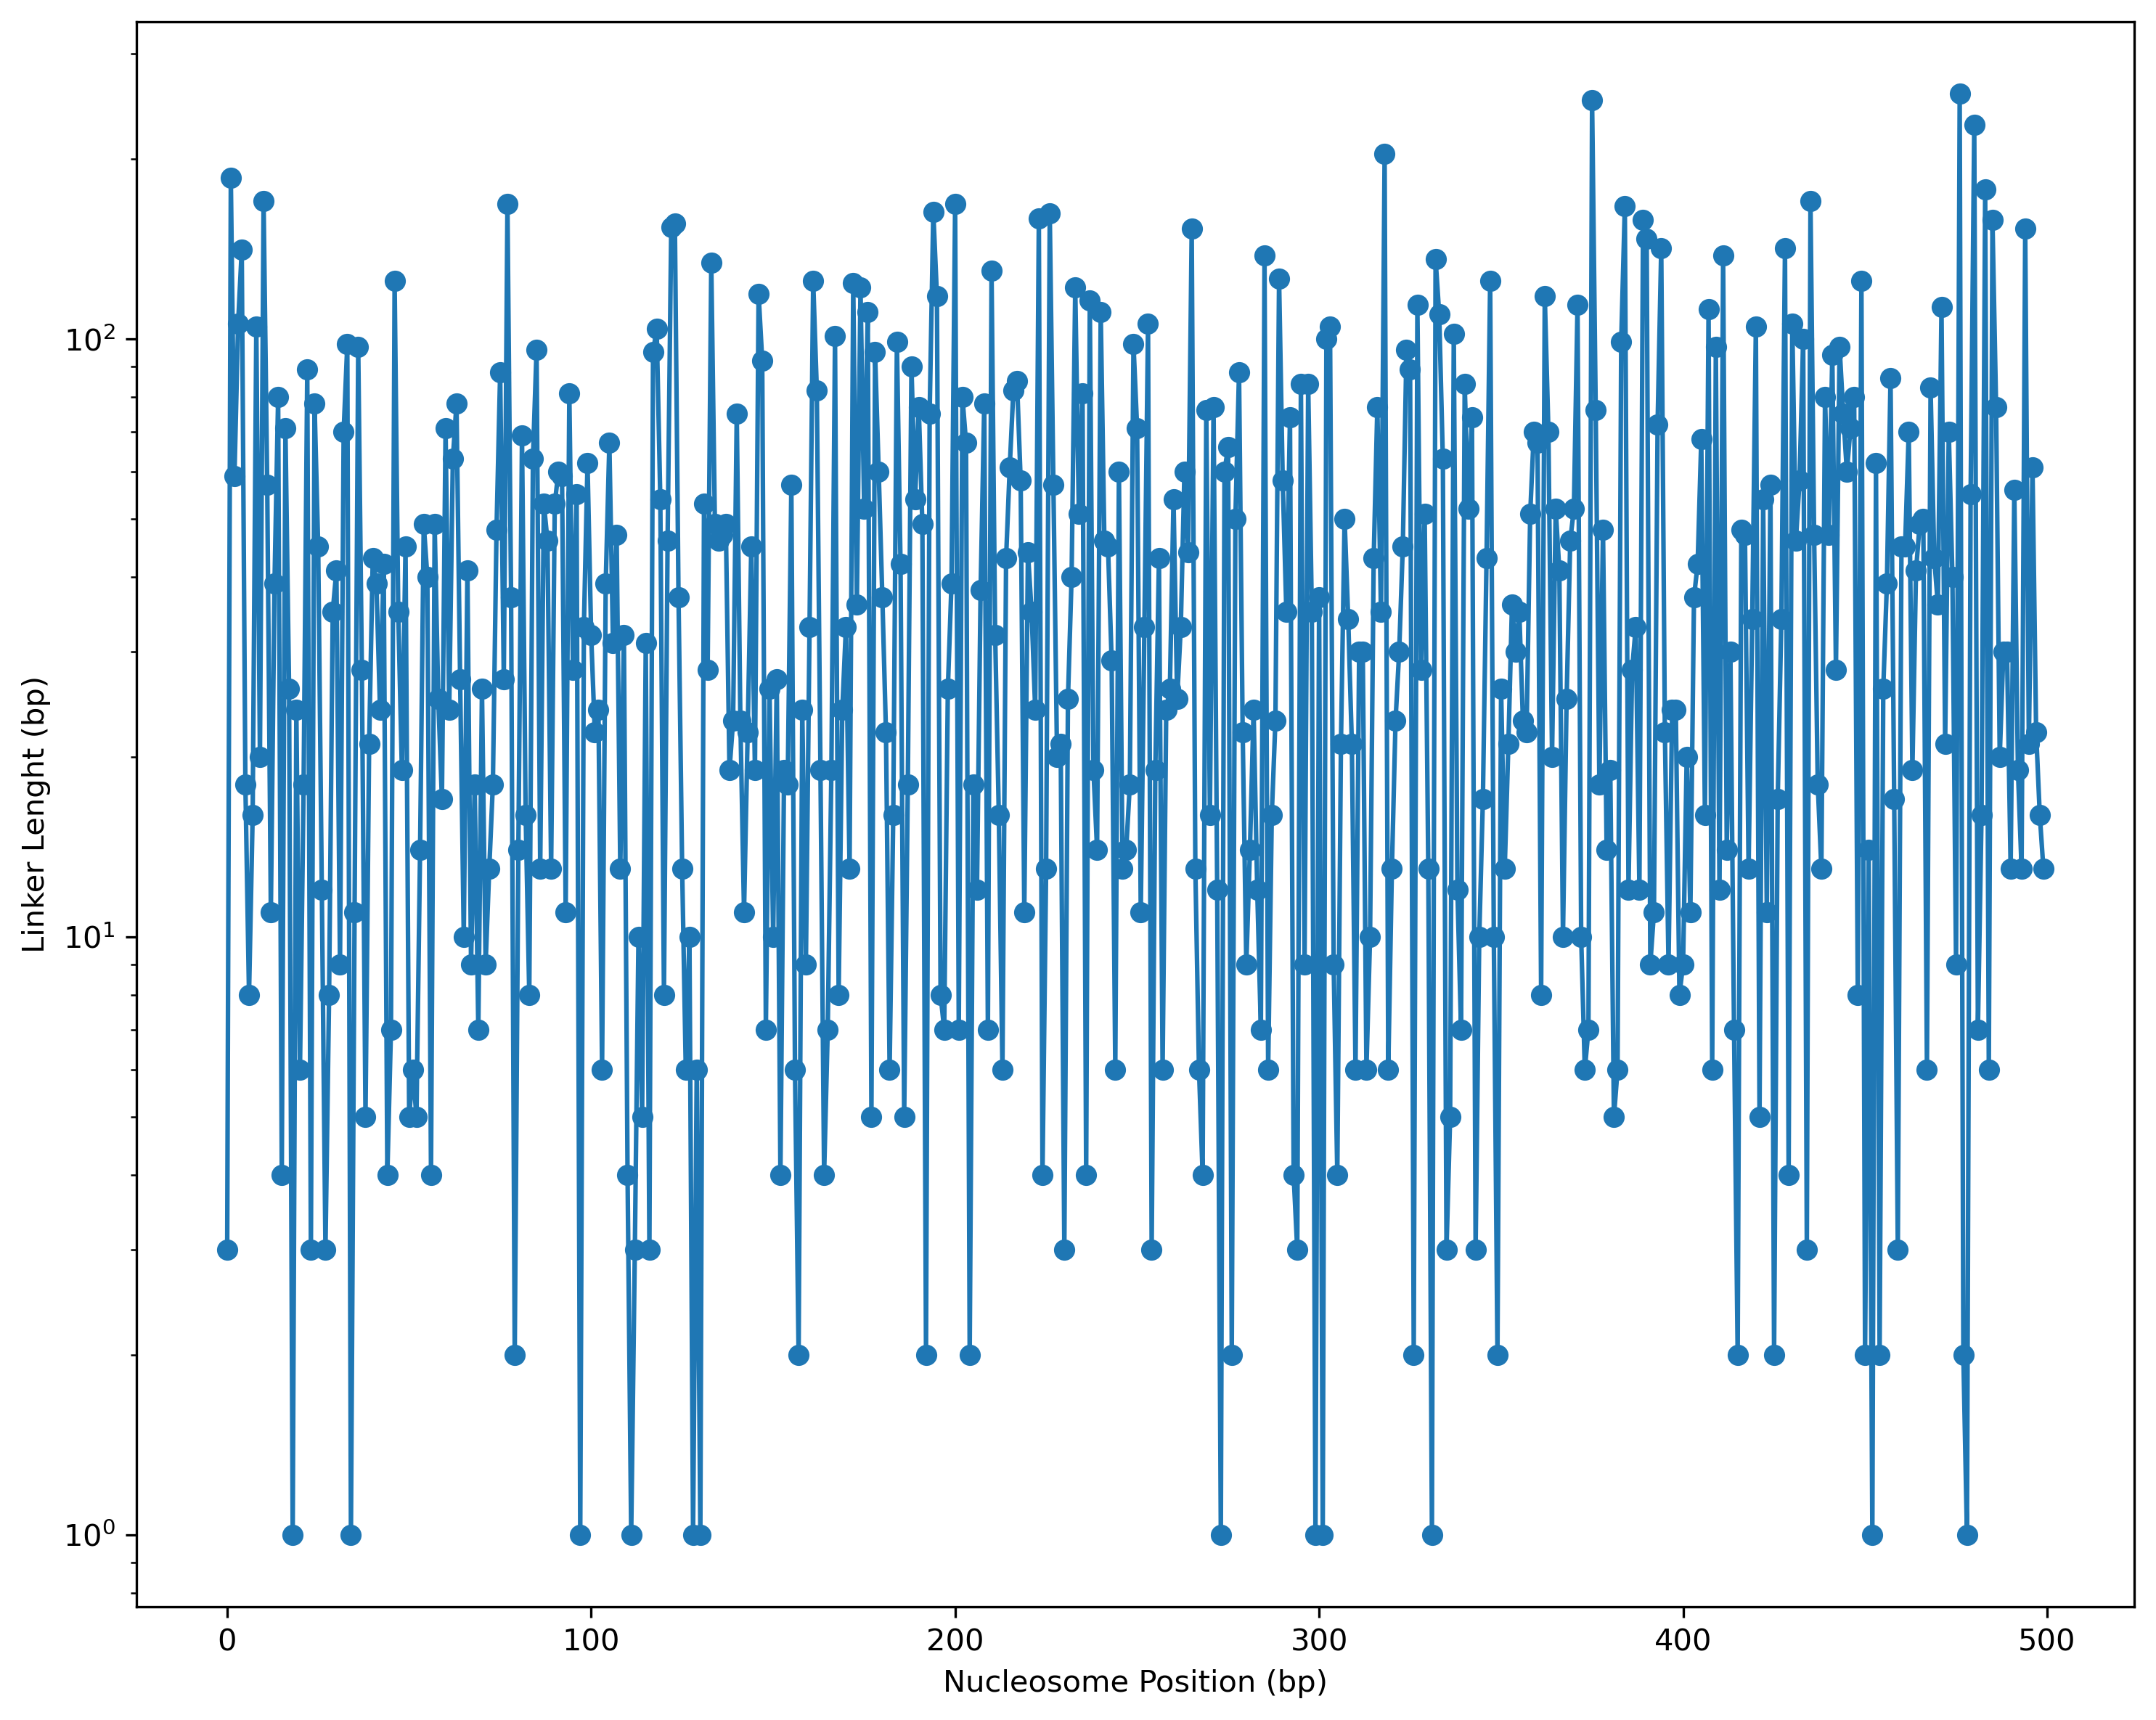

In [10]:
# Plot linker length profile
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(linker_lengths, 'o-')
plt.yscale('log')
plt.xlabel("Nucleosome Position (bp)")
plt.ylabel("Linker Lenght (bp)")
plt.tight_layout()
plt.show()

#### Next Steps

- The cutoff interaction length (15.1 nm) comes from the dinucleosome paper (Machida et al. 2018)
- Try the following fractions methylated: 0.06, 0.08, 0.10
- Vary the chemical potential to get the full dynamic range for the binding isotherm (should be somewhere around -9.0 kT)
- Vary nucleosome array lengths to ensure that chain length is not affecting function
- Use WLC-stat to generate nucleosome configurations for each linker profile
- Find chemical potentials that generate partial clumping of the chromatin fiber
- Generate PDB images of chromatin configurations, and look at cluster distributions
- Mimic analysis from Clodagh C O'Shea's ChromEMT paper to compare our simulated euchromatin clustering results with experiments